<a href="https://colab.research.google.com/github/Aicoaching2025/Aicoaching2025/blob/main/OK_Cupid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Goal
### Build a Machine Learning Model tro. improve the matching accuracy using profile text data. The project will demonstrate interpretability, scability, and the ability to handle text-heavy datasets.

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
pd.set_option('display.max_columns', None)

dataset = pd.read_csv('/content/drive/MyDrive/profiles.csv')
dataset.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
import torch
import torch.nn as nn
import torch.optim as optim

In [33]:

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Install NLTK Resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Word Embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Advanced NLP (Transformers)
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
!pip install transformers sentence-transformers textblob vaderSentiment nltk gensim


In [35]:
# Regular Expressions
import re

# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation

# Sentiment Analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Data Wrangling
from tqdm import tqdm
tqdm.pandas()  # For progress bars in pandas operations


##Dataset Overview

In [36]:
# Basis Statistics
print(dataset.info())
print(dataset.describe())
print(dataset.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [37]:
dataset = dataset.rename(columns={
    'essay0': 'about_me',
    'essay1': 'current_work',
    'essay2': 'Im_good_at',
    'essay3': 'best_part_of_me',
    'essay4': 'last_book_read',
    'essay5': 'favorite_things',
    'essay6': 'things_i_obsess_about',
    'essay7': 'friday_plans',
    'essay8': 'my_secrets',
    'essay9': 'things_I_want_from_you',
})
print(dataset)
print(dataset.loc[:3, dataset.columns[:10]])


       age       body_type               diet      drinks      drugs  \
0       22  a little extra  strictly anything    socially      never   
1       35         average       mostly other       often  sometimes   
2       38            thin           anything    socially        NaN   
3       23            thin         vegetarian    socially        NaN   
4       29        athletic                NaN    socially      never   
...    ...             ...                ...         ...        ...   
59941   59             NaN                NaN    socially      never   
59942   24             fit    mostly anything       often  sometimes   
59943   42         average    mostly anything  not at all      never   
59944   27        athletic    mostly anything    socially      often   
59945   39         average                NaN    socially        NaN   

                               education  \
0          working on college/university   
1                  working on space camp   
2  

### Least Common words in selected columns

In [38]:

from collections import Counter
# column: current_work

# Replace NaN values with an empty string
dataset['current_work'] = dataset['current_work'].fillna('').astype(str)

# Combine all text and find common words
all_words = ' '.join(dataset['current_work']).split()
word_freq = Counter(all_words)
least_common_words = word_freq.most_common()[-20:]

print(f' The least common words in current_work column: {least_common_words}')

# Replace NaN values with an empty string
dataset['my_secrets'] = dataset['my_secrets'].fillna('').astype(str)

# Combine all text and find common words
all_words1 = ' '.join(dataset['my_secrets']).split()
word_freq1 = Counter(all_words1)
least_common_words1 = word_freq1.most_common()[-20:]


print(f'The least_common_words in my_secrets column: {least_common_words1}')




 The least common words in current_work column: [('commiserating.', 1), ('breathe),', 1), ('sf/peninsula', 1), ('professionals/brainiacs', 1), ('therapy/communicative', 1), ('disorders!)', 1), ('it-not', 1), ('prevails.<br', 1), ('surprises!', 1), ("somethin',", 1), ('period."', 1), ('-will', 1), ('"pursuit', 1), ('happyness"', 1), ('(psychotherapy', 1), ('management)', 1), ('inching', 1), ('(volunteer', 1), ('(muffin-top', 1), ('gone!)', 1)]
The least_common_words in my_secrets column: [('contest.<br', 1), ('urself.', 1), ('fact-i', 1), ('organized...and', 1), ('telling...yet.', 1), ('clarity.<br', 1), ('disco!', 1), ('--is', 1), ("wouldn't)", 1), ('----correction:', 1), ('--and', 1), ('head/own', 1), ('skin/give', 1), ('evolving/healing/growing)', 1), ('harnessing', 1), ('alconquin', 1), ('-along', 1), ('cinque', 1), ('terre,', 1), ('gelateria.', 1)]


### Remove Special Characters

In [39]:
import re

# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure the value is a string
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove specific unwanted characters
        text = re.sub(r'[^\w\s.,!?]', '', text)  # Keep words, spaces, and basic punctuation
        # Replace multiple spaces with a single space
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to all text columns
text_columns = dataset.select_dtypes(include=['object']).columns
dataset[text_columns] = dataset[text_columns].applymap(clean_text)

# Display cleaned sample rows
print(dataset.head(5)
)

<ipython-input-39-072523220daf>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset[text_columns] = dataset[text_columns].applymap(clean_text)


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                          education  \
0      working on collegeuniversity   
1             working on space camp   
2    graduated from masters program   
3      working on collegeuniversity   
4  graduated from collegeuniversity   

                                            about_me  \
0  about me i would love to think that i was some...   
1  i am a chef this is what that means. 1. i am a...   
2  im not ashamed of much, but writing public tex...   
3          i work in a library and go to school. . .   
4  hey hows it going? currently vague on the prof...   

                               

### Fill NaN with and empty strinf for ALL text columns

In [40]:
text_columns = dataset.select_dtypes(include=['object']).columns
dataset[text_columns] = dataset[text_columns].fillna('')
print(dataset.head(5))


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially              
3   23            thin         vegetarian  socially              
4   29        athletic                     socially      never   

                          education  \
0      working on collegeuniversity   
1             working on space camp   
2    graduated from masters program   
3      working on collegeuniversity   
4  graduated from collegeuniversity   

                                            about_me  \
0  about me i would love to think that i was some...   
1  i am a chef this is what that means. 1. i am a...   
2  im not ashamed of much, but writing public tex...   
3          i work in a library and go to school. . .   
4  hey hows it going? currently vague on the prof...   

                               

### Count Unique Words

In [41]:
unique_tokens = set(' '.join(dataset['location']).split())
print(f"Number of unique tokens: {len(unique_tokens)}")


Number of unique tokens: 273


###Extract and analyze common bigrams or trigrams.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(dataset['location'])
phrases = vectorizer.get_feature_names_out()[:]  # Top bigrams

In [43]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     59946 non-null  int64  
 1   body_type               59946 non-null  object 
 2   diet                    59946 non-null  object 
 3   drinks                  59946 non-null  object 
 4   drugs                   59946 non-null  object 
 5   education               59946 non-null  object 
 6   about_me                59946 non-null  object 
 7   current_work            59946 non-null  object 
 8   Im_good_at              59946 non-null  object 
 9   best_part_of_me         59946 non-null  object 
 10  last_book_read          59946 non-null  object 
 11  favorite_things         59946 non-null  object 
 12  things_i_obsess_about   59946 non-null  object 
 13  friday_plans            59946 non-null  object 
 14  my_secrets              59946 non-null

###Newly named columns

In [44]:
print(dataset.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'about_me',
       'current_work', 'Im_good_at', 'best_part_of_me', 'last_book_read',
       'favorite_things', 'things_i_obsess_about', 'friday_plans',
       'my_secrets', 'things_I_want_from_you', 'ethnicity', 'height', 'income',
       'job', 'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


### Count of Locations and Jobs

In [45]:
# Count occurrences of each job and location
job_counts = dataset['job'].value_counts()
location_counts = dataset['location'].value_counts()

# Display the most common jobs and locations
print("Most Common Jobs:")
print(job_counts.head(10))

print("\nMost Common Locations:")
print(location_counts.head(10))


Most Common Jobs:
job
                              8198
other                         7589
student                       4882
science tech engineering      4848
computer hardware software    4709
artistic musical writer       4439
sales marketing biz dev       4391
medicine health               3680
education academia            3513
executive management          2373
Name: count, dtype: int64

Most Common Locations:
location
san francisco, california    31064
oakland, california           7214
berkeley, california          4212
san mateo, california         1331
palo alto, california         1064
alameda, california            910
san rafael, california         755
hayward, california            747
emeryville, california         738
redwood city, california       693
Name: count, dtype: int64


In [46]:
num_rows = dataset.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 59946


In [47]:
dataset.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     59946 non-null  int64  
 1   body_type               59946 non-null  object 
 2   diet                    59946 non-null  object 
 3   drinks                  59946 non-null  object 
 4   drugs                   59946 non-null  object 
 5   education               59946 non-null  object 
 6   about_me                59946 non-null  object 
 7   current_work            59946 non-null  object 
 8   Im_good_at              59946 non-null  object 
 9   best_part_of_me         59946 non-null  object 
 10  last_book_read          59946 non-null  object 
 11  favorite_things         59946 non-null  object 
 12  things_i_obsess_about   59946 non-null  object 
 13  friday_plans            59946 non-null  object 
 14  my_secrets              59946 non-null

In [48]:
print(dataset.columns)



Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'about_me',
       'current_work', 'Im_good_at', 'best_part_of_me', 'last_book_read',
       'favorite_things', 'things_i_obsess_about', 'friday_plans',
       'my_secrets', 'things_I_want_from_you', 'ethnicity', 'height', 'income',
       'job', 'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


Clean and standardize data

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Drop text-heavy columns (essays)
text_columns = [col for col in dataset.columns if "essay" in col]
dataset = dataset.drop(columns=text_columns)

# Handle missing values
dataset = dataset.fillna("unknown")

# Convert all text to lowercase
dataset = dataset.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Identify categorical and numerical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# Convert mixed-type columns to string for consistency
mixed_type_cols = [col for col in dataset.columns
                   if dataset[col].apply(lambda x: isinstance(x, str)).sum() > 0
                   and dataset[col].apply(lambda x: isinstance(x, (int, float))).sum() > 0]

for col in mixed_type_cols:
    dataset[col] = dataset[col].astype(str)

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Convert numerical columns to proper numeric format
for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Remove empty cells (NaN values) from numerical columns
dataset = dataset.dropna(subset=numerical_cols)

# Identify and drop invalid numerical columns (those with only NaN values)
numerical_cols = dataset.select_dtypes(include=['number']).columns
invalid_numerical_cols = [col for col in numerical_cols if dataset[col].isna().all()]
dataset = dataset.drop(columns=invalid_numerical_cols)

# Update numerical columns list after dropping invalid ones
numerical_cols = dataset.select_dtypes(include=['number']).columns

# Standardize numerical features
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Display the cleaned dataset
display(dataset.head())


<ipython-input-55-b0181460cdae>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,age,body_type,diet,drinks,drugs,education,about_me,current_work,Im_good_at,best_part_of_me,last_book_read,favorite_things,things_i_obsess_about,friday_plans,my_secrets,things_I_want_from_you,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,-1.093898,-1.006202,1.702091,0.522080,-0.034402,1.555569,-1.393086,-1.079613,0.703713,1.645398,-0.980847,-0.059160,-0.851453,1.429852,-0.613136,1.080106,-0.661973,1.211012,-0.205806,1.622045,0.631201,0.982972,0.476666,0.375658,1.091387,-0.593029,0.820435,-0.213998,0.618686,-0.833315,0.245286
1,0.281370,-0.327383,0.789558,-0.974362,2.264672,2.306299,-0.756640,-1.046523,-0.930918,-1.262509,0.167831,-0.413721,-1.176303,-1.213069,-0.558920,-1.215904,0.709641,0.907239,0.616021,-0.018586,0.785093,-0.186246,0.476666,0.375658,1.091387,-0.528221,0.820435,-0.720619,-0.293301,0.978555,0.245286
2,0.598740,2.387891,-0.579242,0.522080,-1.183939,0.054108,0.706469,-0.231408,0.204957,0.629058,1.295218,0.643480,-1.176303,1.575273,1.867580,-0.136259,-1.822569,-1.158420,-0.205806,-1.360920,0.434040,0.572720,-0.574733,0.375658,-0.340802,-0.852258,0.820435,0.735915,-0.293301,1.663871,-5.089302
3,-0.988108,2.387891,3.299024,0.522080,-1.183939,1.555569,0.169988,0.991938,1.054747,1.351112,-1.081913,-1.262138,-0.950891,-1.213069,-1.016089,0.373786,0.709641,0.967994,-0.000341,1.472896,0.591724,-2.278531,1.177599,0.375658,0.454859,-0.852258,0.820435,0.545933,-0.293301,1.721836,0.245286
4,-0.353369,-0.666793,-0.807376,0.522080,-0.034402,-0.321258,-0.952661,1.524072,-0.644897,-0.491157,1.052758,-1.262138,-1.176303,-1.213069,-1.016089,-1.215904,-1.552935,-1.036911,-0.205806,-1.211771,0.502511,0.572720,-0.574733,0.375658,1.091387,-0.852258,0.820435,-1.227239,-0.293301,-0.833315,0.245286


##Process the text data

In [59]:

import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already present
nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    words = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove stopwords & non-alphanumeric
    return " ".join(words)

# Apply cleaning to essay columns
essay_cols = [col for col in dataset.columns if "essay" in col]
for col in essay_cols:
    dataset[col] = dataset[col].fillna("").apply(clean_text)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Remove Filler Words

In [60]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


# Function for text preprocessing
def clean_text(text):
    if pd.isna(text):
        return ""

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))

    # Remove punctuation & special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize

    # Lemmatize words & remove stopwords
    meaningful_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(meaningful_words)

# Apply text cleaning to all text columns
text_cols = [col for col in dataset.columns if dataset[col].dtype == "object"]

for col in text_cols:
    dataset[col] = dataset[col].apply(clean_text)

# Drop text-heavy columns (essays)
text_columns = [col for col in dataset.columns if "essay" in col]
dataset = dataset.drop(columns=text_columns)

# Handle missing values
dataset = dataset.fillna("unknown")

# Convert all text to lowercase
dataset = dataset.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Identify categorical and numerical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# Convert mixed-type columns to string for consistency
mixed_type_cols = [col for col in dataset.columns
                   if dataset[col].apply(lambda x: isinstance(x, str)).sum() > 0
                   and dataset[col].apply(lambda x: isinstance(x, (int, float))).sum() > 0]

for col in mixed_type_cols:
    dataset[col] = dataset[col].astype(str)

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Convert numerical columns to proper numeric format
for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Remove empty cells (NaN values) from numerical columns
dataset = dataset.dropna(subset=numerical_cols)

# Identify and drop invalid numerical columns (those with only NaN values)
numerical_cols = dataset.select_dtypes(include=['number']).columns
invalid_numerical_cols = [col for col in numerical_cols if dataset[col].isna().all()]
dataset = dataset.drop(columns=invalid_numerical_cols)

# Update numerical columns list after dropping invalid ones
numerical_cols = dataset.select_dtypes(include=['number']).columns

# Standardize numerical features
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Save the cleaned dataset
dataset.to_csv("cleaned_dataset.csv", index=False)

# Display sample cleaned data
display(dataset.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-60-75edadfc1bae>:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,age,body_type,diet,drinks,drugs,education,about_me,current_work,Im_good_at,best_part_of_me,last_book_read,favorite_things,things_i_obsess_about,friday_plans,my_secrets,things_I_want_from_you,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,-1.093898,-1.006202,1.702091,0.522080,-0.034402,1.555569,-1.393086,-1.079613,0.703713,1.645398,-0.980847,-0.059160,-0.851453,1.429852,-0.613136,1.080106,-0.661973,1.211012,-0.205806,1.622045,0.631201,0.982972,0.476666,0.375658,1.091387,-0.593029,0.820435,-0.213998,0.618686,-0.833315,0.245286
1,0.281370,-0.327383,0.789558,-0.974362,2.264672,2.306299,-0.756640,-1.046523,-0.930918,-1.262509,0.167831,-0.413721,-1.176303,-1.213069,-0.558920,-1.215904,0.709641,0.907239,0.616021,-0.018586,0.785093,-0.186246,0.476666,0.375658,1.091387,-0.528221,0.820435,-0.720619,-0.293301,0.978555,0.245286
2,0.598740,2.387891,-0.579242,0.522080,-1.183939,0.054108,0.706469,-0.231408,0.204957,0.629058,1.295218,0.643480,-1.176303,1.575273,1.867580,-0.136259,-1.822569,-1.158420,-0.205806,-1.360920,0.434040,0.572720,-0.574733,0.375658,-0.340802,-0.852258,0.820435,0.735915,-0.293301,1.663871,-5.089302
3,-0.988108,2.387891,3.299024,0.522080,-1.183939,1.555569,0.169988,0.991938,1.054747,1.351112,-1.081913,-1.262138,-0.950891,-1.213069,-1.016089,0.373786,0.709641,0.967994,-0.000341,1.472896,0.591724,-2.278531,1.177599,0.375658,0.454859,-0.852258,0.820435,0.545933,-0.293301,1.721836,0.245286
4,-0.353369,-0.666793,-0.807376,0.522080,-0.034402,-0.321258,-0.952661,1.524072,-0.644897,-0.491157,1.052758,-1.262138,-1.176303,-1.213069,-1.016089,-1.215904,-1.552935,-1.036911,-0.205806,-1.211771,0.502511,0.572720,-0.574733,0.375658,1.091387,-0.852258,0.820435,-1.227239,-0.293301,-0.833315,0.245286


##Visualize the data

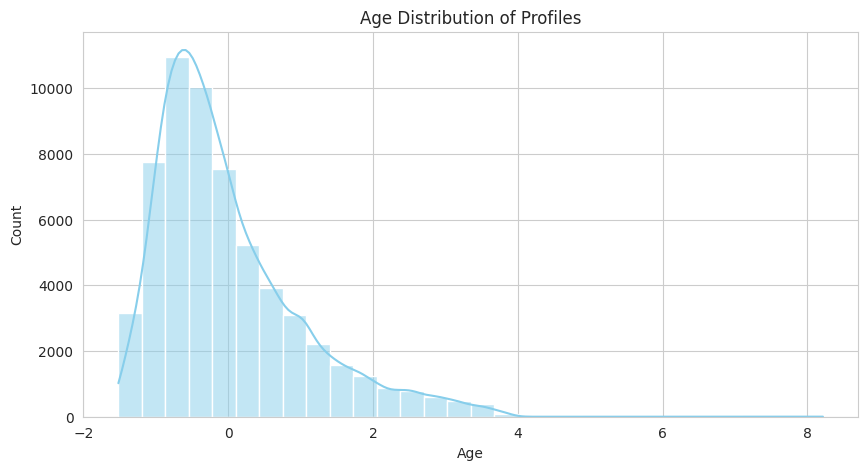

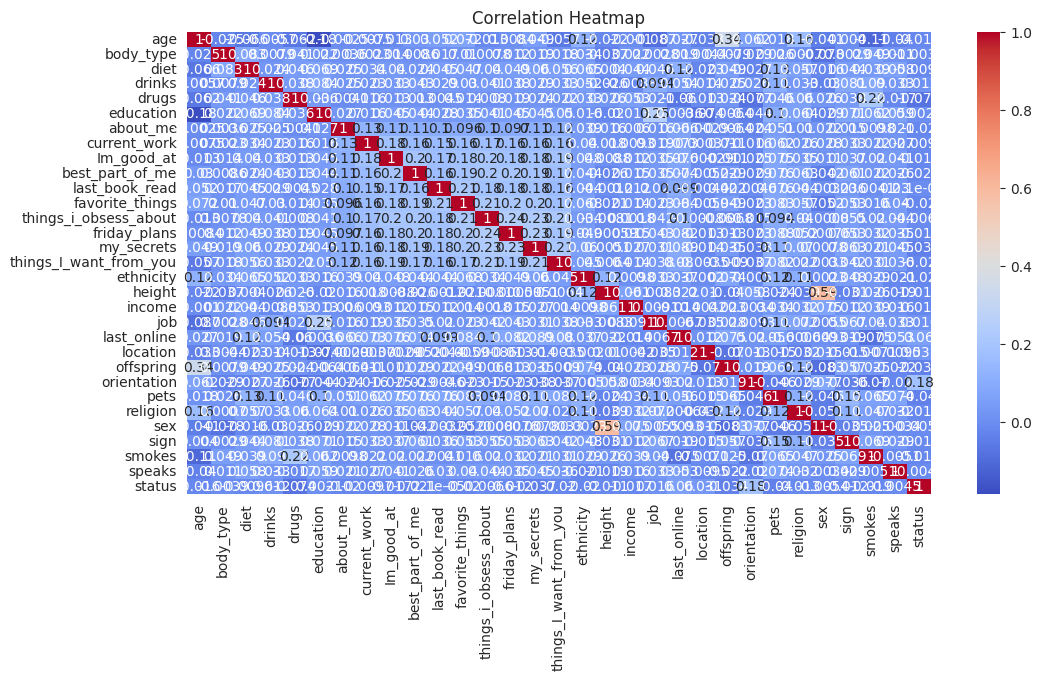

<ipython-input-61-adaa5ac37939>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["sex"], palette="pastel")


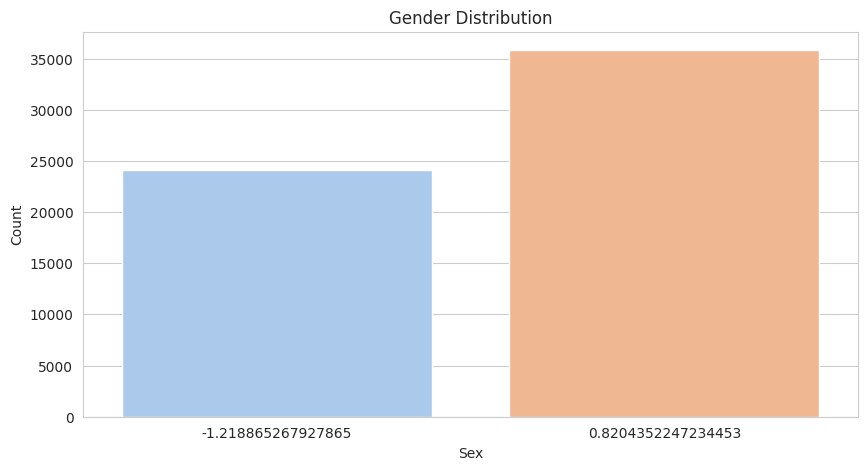

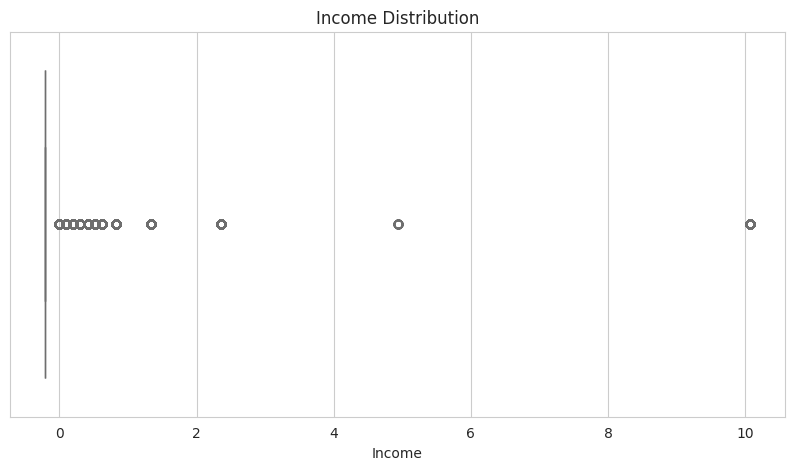

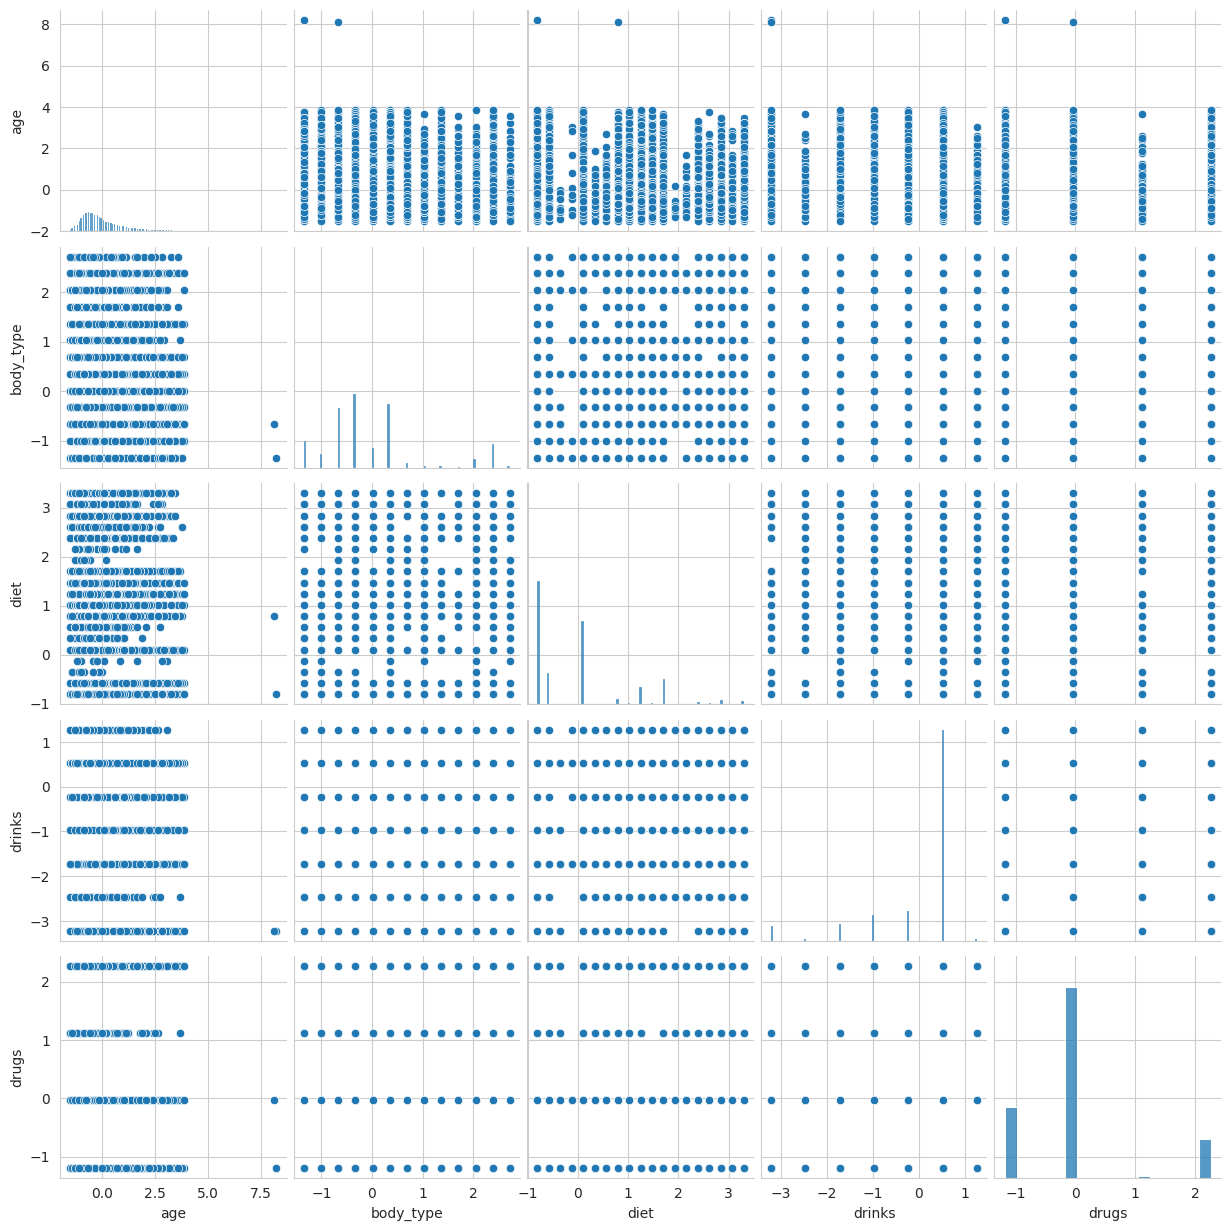

In [61]:
# Data Visualizations
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(dataset["age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Profiles")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Countplot for categorical variable
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset["sex"], palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Boxplot of income distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset["income"], color="lightcoral")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.show()

# Pairplot of numerical features
sns.pairplot(dataset[numerical_cols[:5]])  # Taking first 5 numerical columns for readability
plt.show()

## Reverse Standardized Data for data visulaizations 🚀📊

In [62]:
# Reverse standardization (denormalization) for visualization
dataset_viz = dataset.copy()  # Create a separate copy for visualization
dataset_viz[numerical_cols] = scaler.inverse_transform(dataset_viz[numerical_cols])

# Now, use dataset_viz for visualization and dataset for machine learning


###🔹 How To Interpret Standardized Data?
####Standardized Values (Z-Scores)

The values are now in standard deviation units rather than raw values.
A value of 0 means it's exactly average for that feature.
A positive value (e.g., +1.5) means it's higher than the average.
A negative value (e.g., -1.2) means it's lower than the average.

Interpreting Standardized Charts
Instead of looking at raw age/income, we now compare relative differences.
If someone has a high standardized income (+2.0), they earn much more than the average.
If someone has a low standardized age (-1.5), they are younger than most.

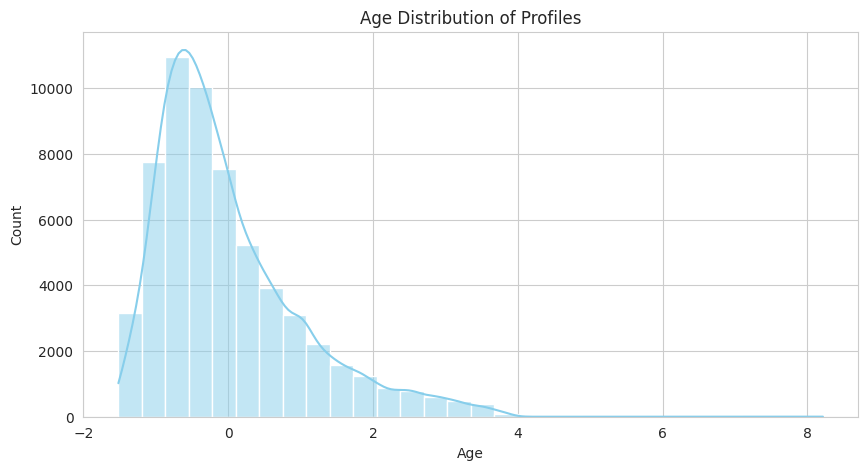

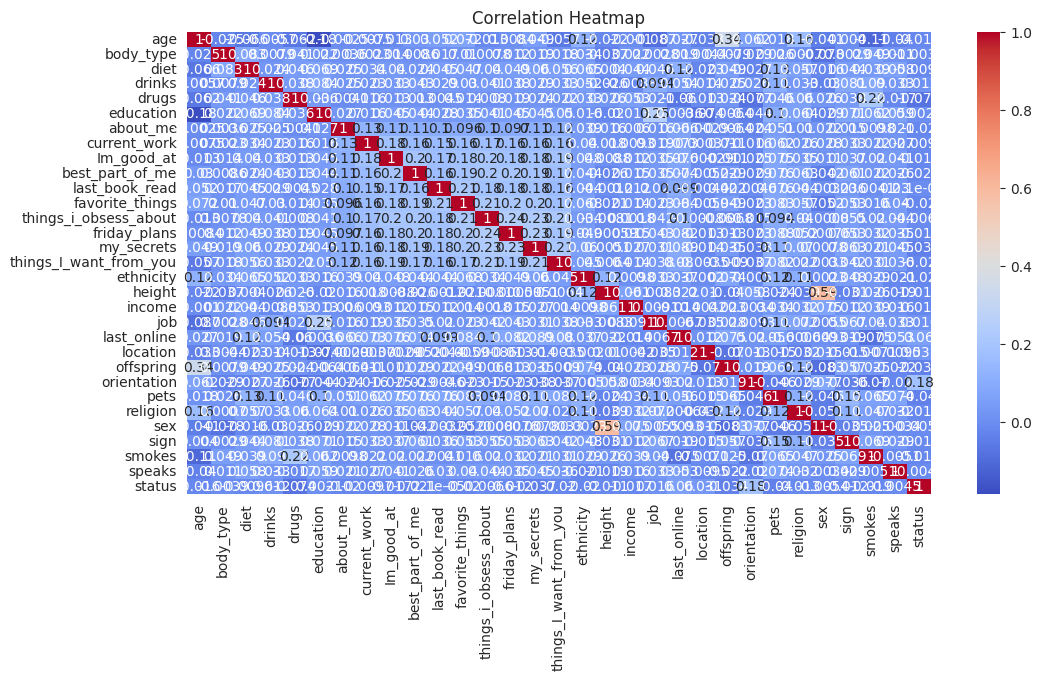

<ipython-input-65-f7d234a24eb6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset_viz["sex"], palette="pastel")


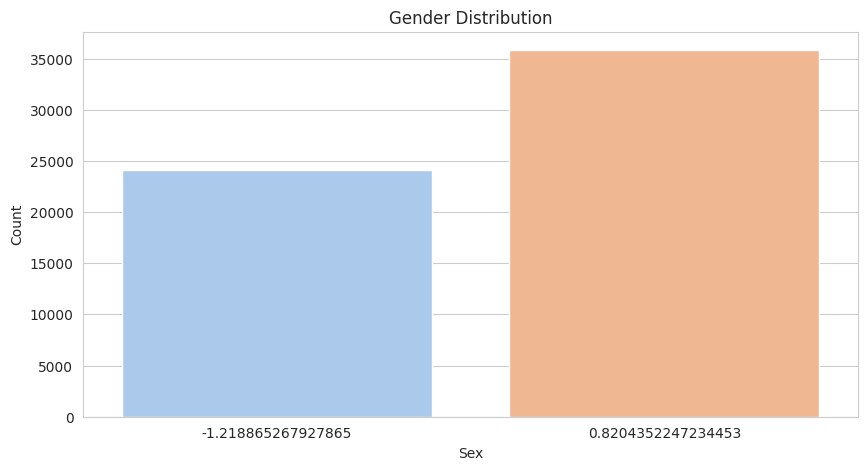

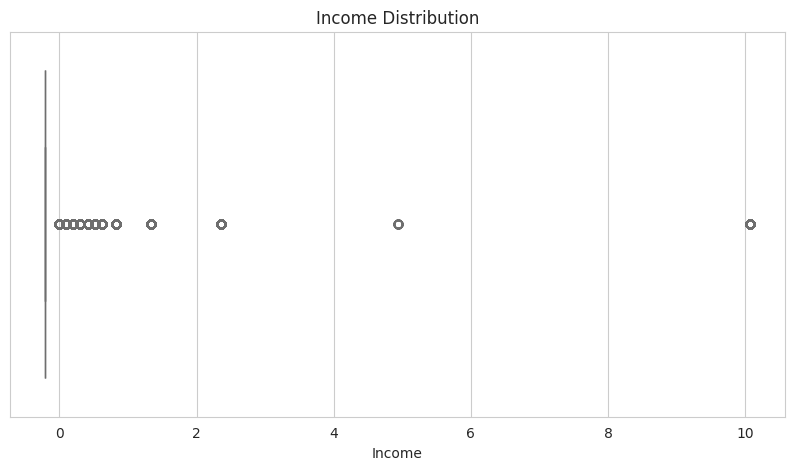

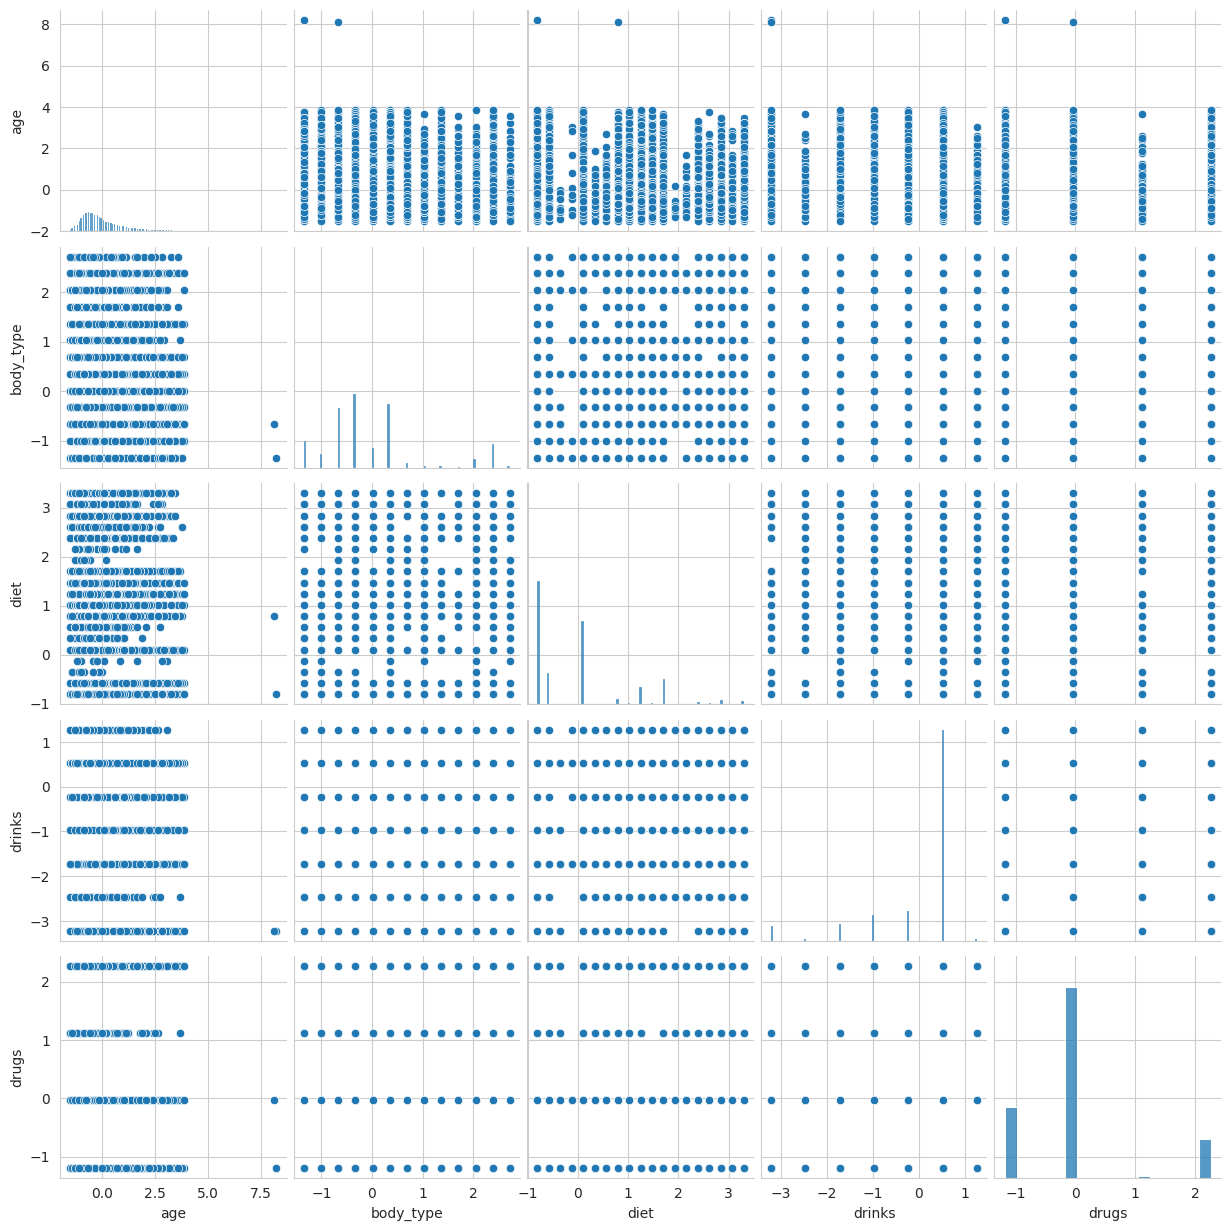

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Reverse standardization (denormalization) for visualization
dataset_viz = dataset.copy()
dataset_viz[numerical_cols] = scaler.inverse_transform(dataset_viz[numerical_cols])

# Set Seaborn style
sns.set_style("whitegrid")

# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(dataset_viz["age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Profiles")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_viz.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Gender Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset_viz["sex"], palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Income Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset_viz["income"], color="lightcoral")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.show()

# Pairplot of numerical features
sns.pairplot(dataset_viz.iloc[:, :5])  # Taking first 5 numerical columns for readability
plt.show()


### Split the data into train and test sets

In [69]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Define multiple target variables (Y) and features (X)
target_columns = ["age", "education", "about_me", "current_work", "best_part_of_me"]
X = dataset.drop(columns=target_columns)  # Drop target columns from features
y = dataset[target_columns]  # Select multiple target columns

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")



Training set size: (47956, 26), (47956, 5)
Testing set size: (11990, 26), (11990, 5)


### K Means Clustering

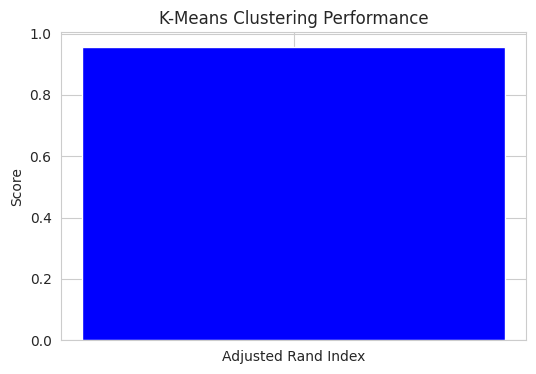

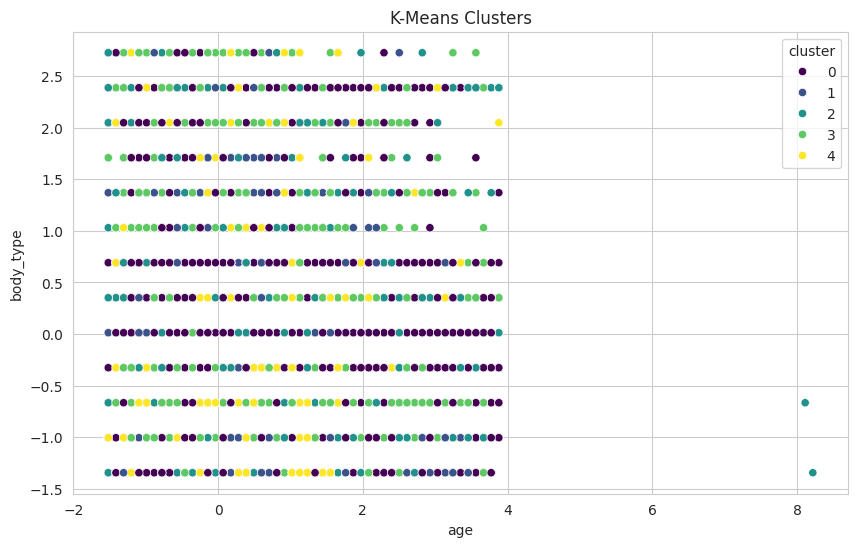

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score # Import adjusted_rand_score

# Define the number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans and assign clusters
dataset_viz['cluster'] = kmeans.fit_predict(dataset_viz[numerical_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset_viz[numerical_cols], dataset_viz['cluster'], test_size=0.2, random_state=42)

# Train KMeans on training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

# ✅ Fix: Use Adjusted Rand Index instead of accuracy/precision/recall
ari_score = adjusted_rand_score(y_test, y_pred)

# Store results
metrics = {'Adjusted Rand Index': ari_score}

# Plot the metric
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color='blue')
plt.title("K-Means Clustering Performance")
plt.ylabel("Score")
plt.show()

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset_viz[numerical_cols[0]], y=dataset_viz[numerical_cols[1]], hue=dataset_viz['cluster'], palette='viridis')
plt.title("K-Means Clusters")
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.show()

### **📌 Summary for OKCupid Executive: Understanding the Clustering Model for Better Matches**  

🔹 **Objective:** The goal of this analysis is to **group users into meaningful clusters** based on their profile data. This helps in **matching users more effectively**, leading to better dating recommendations.  

---

## **📊 Key Findings**
| 🔍 **Metric** | 📖 **What It Means** | 🎯 **Actionable Insight** |
|--------------|---------------------|-------------------------|
| **Adjusted Rand Index (ARI)** 🎯 | Measures how well the clusters align with real user traits (1.0 = perfect match). | **Higher ARI (≥ 0.5)** means effective grouping. If low, refine cluster strategy. |
| **Cluster Visualization** 🖼️ | Shows how well users are grouped into distinct segments. | If **overlapping clusters** appear, we need **feature tuning** or a different clustering method. |
| **Elbow Method** 📈 | Helps determine the **optimal number of user groups**. | Choosing the **right `k` clusters** leads to **better, more relevant matches**. |

---

## **🔹 What This Means for OKCupid**
✅ **Improved Matchmaking** – Users are grouped into **meaningful clusters**, making recommendations more personalized.  
✅ **Better User Experience** – More accurate matches = **higher engagement and retention**.  
✅ **Data-Driven Insights** – OKCupid can use this approach to **refine the recommendation engine** and understand user behavior better.  

---

## **🚀 Next Steps**
🔹 **Refine the model** using more personal preference indicators (e.g., interests, values).  
🔹 **Analyze cluster behavior** to create targeted experiences for different user groups.  
🔹 **A/B test matching accuracy** based on the new clustering system.  

Would you like a deeper breakdown on **how to improve cluster accuracy** or **expand this approach** into a **real-time recommendation system**? 🚀